In [46]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pdb

In [7]:
npfile = np.load('rs_no_pval_criterion_200118.npy',allow_pickle=True)[()]

In [12]:
npfile['rs'][0][0].shape

(4234, 6, 6)

<IPython.core.display.Javascript object>


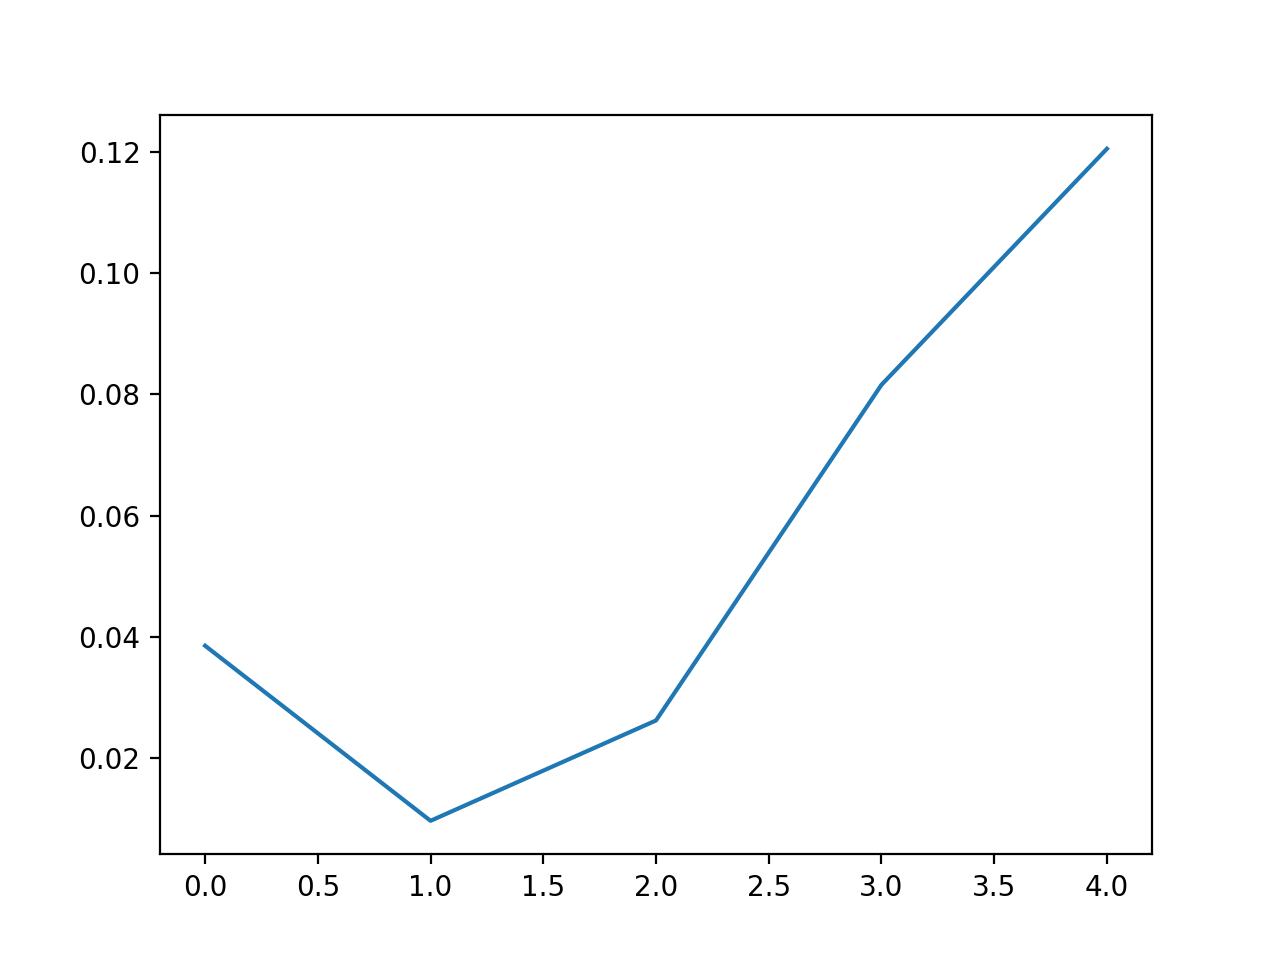

In [21]:
plt.figure()
plt.plot(npfile['rs'][0][0][20,:,-1])
plt.plot(npfile['rs'][0][0][20,:,-1])

In [54]:
def align_by_prefsize(arr):

    nsize = arr.shape[1]
    prefsize = np.argmax(arr[:,:,-1],axis=1)

    sz = arr.shape

    nroi = sz[0];
    arr_pref_aligned = np.nan*np.ones((nroi,sz[1],2*nsize-1,sz[3]))
    startat = nsize-1-prefsize;
    endat = prefsize+nsize-1;
    these_nos = np.zeros((nroi,nsize));
    for iroi in range(nroi):
        these_nos[iroi] = np.arange(nsize+1-prefsize[iroi],2*nsize-prefsize[iroi])
        arr_pref_aligned[iroi,:,these_nos[iroi],:] = arr[iroi,:,:,:]
    return arr_pref_aligned

In [57]:
def safe_predict_proba_(logreg,features):
    output = np.zeros((features.shape[0],))
    lkat = ~np.isnan(features.sum(1)) & np.all(np.abs(features)<np.inf,axis=1)
    output[~lkat] = np.nan
    output[lkat] = logreg.predict_proba(features[lkat])[:,1]
    return output

In [58]:
arr_pref_aligned = align_by_prefsize(npfile['rs'][0][0][:100])

IndexError: tuple index out of range

(10, 6, 6)